# 라이브러리 및 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
import pingouin as pg
import scipy.stats as stats
import scikit_posthocs as sp

In [3]:
df = pd.read_csv('../Nanodegree/Projects/01. PUBG/dataset/tier_diff_duo.csv')

# df = pd.read_csv('../dataset/duo/tier_diff_duo.csv')

In [4]:
df.shape

(491883, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491883 entries, 0 to 491882
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_kills         491883 non-null  float64
 1   player_dmg           491883 non-null  float64
 2   player_assists       491883 non-null  float64
 3   player_dbno          491883 non-null  float64
 4   kda                  491883 non-null  float64
 5   player_dist_walk     491883 non-null  float64
 6   player_dist_ride     491883 non-null  float64
 7   kill_dist            488660 non-null  float64
 8   player_survive_time  491883 non-null  float64
 9   team_placement       491883 non-null  float64
 10  num_of_match         491883 non-null  int64  
 11  tier                 491883 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 45.0 MB


In [6]:
df.isnull().sum()

player_kills              0
player_dmg                0
player_assists            0
player_dbno               0
kda                       0
player_dist_walk          0
player_dist_ride          0
kill_dist              3223
player_survive_time       0
team_placement            0
num_of_match              0
tier                      0
dtype: int64

In [7]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Tier별 차이 검정

In [8]:
df.corr().style.background_gradient(cmap='Blues')

,player_kills,player_dmg,player_assists,player_dbno,kda,player_dist_walk,player_dist_ride,kill_dist,player_survive_time,team_placement,num_of_match,tier
player_kills,1.000000,0.954257,0.407881,0.920787,0.947421,0.250205,0.124500,0.221956,0.232653,-0.227531,0.012740,0.392258
player_dmg,0.954257,1.000000,0.460522,0.928578,0.920551,0.276766,0.161029,0.246556,0.267721,-0.261751,0.014818,0.421273
player_assists,0.407881,0.460522,1.000000,0.364590,0.567572,0.227936,0.165668,0.173685,0.242717,-0.232999,0.009817,0.229582
player_dbno,0.920787,0.928578,0.364590,1.000000,0.867298,0.210189,0.110536,0.196960,0.191598,-0.189125,0.015050,0.382281
kda,0.947421,0.920551,0.567572,0.867298,1.000000,0.279741,0.157264,0.241976,0.271085,-0.263557,0.006569,0.373832
player_dist_walk,0.250205,0.276766,0.227936,0.210189,0.279741,1.000000,0.481693,0.322477,0.862827,-0.823014,-0.072573,0.165108
player_dist_ride,0.124500,0.161029,0.165668,0.110536,0.157264,0.481693,1.000000,0.233895,0.669671,-0.615923,-0.011174,0.148832
kill_dist,0.221956,0.246556,0.173685,0.196960,0.241976,0.322477,0.233895,1.000000,0.331516,-0.315967,-0.034834,0.108062
player_survive_time,0.232653,0.267721,0.242717,0.191598,0.271085,0.862827,0.669671,0.331516,1.000000,-0.915198,-0.053643,0.194376
team_placement,-0.227531,-0.261751,-0.232999,-0.189125,-0.263557,-0.823014,-0.615923,-0.315967,-0.915198,1.000000,0.055912,-0.206114


## player_kills
* Tier와 평균 kill 횟수는 비례함

In [79]:
df.groupby('tier')['player_kills'].describe()

,count,mean,std,min,25%,50%,75%,max
tier,,,,,,,,
1.000,39512.000,0.328,0.215,0.000,0.182,0.300,0.455,1.455
2.000,233947.000,0.740,0.412,0.000,0.438,0.667,1.000,3.100
3.000,162370.000,1.062,0.635,0.000,0.625,0.923,1.346,7.100
4.000,48115.000,1.191,0.774,0.000,0.720,1.021,1.434,13.400
5.000,7272.000,1.314,0.786,0.000,0.819,1.142,1.600,10.235
6.000,667.000,1.389,0.805,0.243,0.872,1.250,1.731,7.262


<AxesSubplot:xlabel='player_kills', ylabel='Density'>

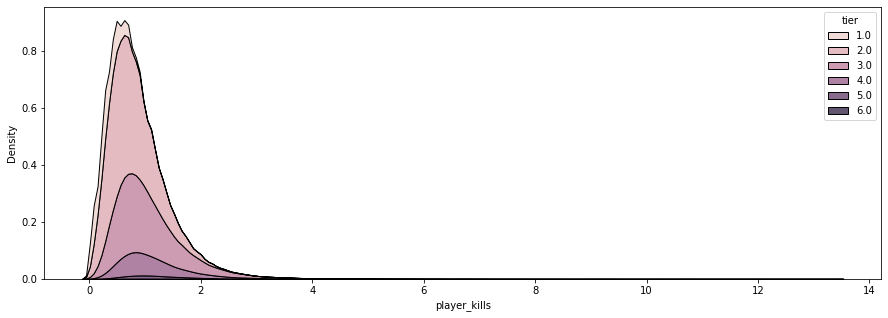

In [80]:
plt.figure(figsize=(15, 5))
sns.kdeplot(data=df, x='player_kills', hue='tier', multiple='stack')

In [81]:
tier1 = stats.anderson(df.loc[df['tier'] == 1, 'player_kills'], dist='norm')
tier2 = stats.anderson(df.loc[df['tier'] == 2, 'player_kills'], dist='norm')
tier3 = stats.anderson(df.loc[df['tier'] == 3, 'player_kills'], dist='norm')
tier4 = stats.anderson(df.loc[df['tier'] == 4, 'player_kills'], dist='norm')
tier5 = stats.anderson(df.loc[df['tier'] == 5, 'player_kills'], dist='norm')
tier6 = stats.anderson(df.loc[df['tier'] == 6, 'player_kills'], dist='norm')

print('tier1:', tier1[0] < tier1[1][2], '\n' 
      'tier2:', tier2[0] < tier2[1][2], '\n'
      'tier3:', tier3[0] < tier3[1][2], '\n'
      'tier4:', tier4[0] < tier3[1][2], '\n'
      'tier5:', tier5[0] < tier3[1][2], '\n'
      'tier6:', tier6[0] < tier3[1][2], '\n')

tier1: False 
tier2: False 
tier3: False 
tier4: False 
tier5: False 
tier6: False 



In [82]:
stats.kruskal(df.loc[df['tier'] == 1, 'player_kills'],
              df.loc[df['tier'] == 2, 'player_kills'],
              df.loc[df['tier'] == 3, 'player_kills'],
              df.loc[df['tier'] == 4, 'player_kills'],
              df.loc[df['tier'] == 5, 'player_kills'],
              df.loc[df['tier'] == 6, 'player_kills'])

KruskalResult(statistic=100864.03763299476, pvalue=0.0)

In [83]:
sp.posthoc_conover(df, val_col ='player_kills', 
                     group_col ='tier', p_adjust = 'holm').style.background_gradient(cmap='Blues')

,1.0,2.0,3.0,4.0,5.0,6.0
1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
4.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
5.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.008726
6.0,0.000000,0.000000,0.000000,0.000000,0.008726,1.000000


## player_dmg

In [84]:
df.groupby('tier')['player_dmg'].describe()

,count,mean,std,min,25%,50%,75%,max
tier,,,,,,,,
1.000,39512.000,54.034,22.460,0.000,37.700,52.833,69.157,149.400
2.000,233947.000,107.030,45.351,0.000,74.143,100.700,133.279,325.800
3.000,162370.000,146.216,71.871,0.000,96.500,131.538,179.667,719.500
4.000,48115.000,161.499,88.046,0.000,107.632,142.800,190.893,1279.600
5.000,7272.000,174.857,89.305,0.000,118.444,156.502,208.683,1074.824
6.000,667.000,182.751,92.256,45.187,121.859,165.968,223.911,820.524


<AxesSubplot:xlabel='tier', ylabel='player_dmg'>

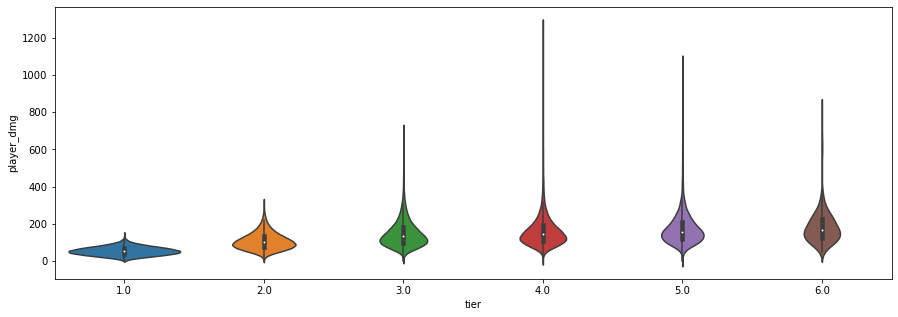

In [85]:
plt.figure(figsize=(15,5))
sns.violinplot(data=df, x='tier', y='player_dmg')

<AxesSubplot:xlabel='player_dmg', ylabel='Density'>

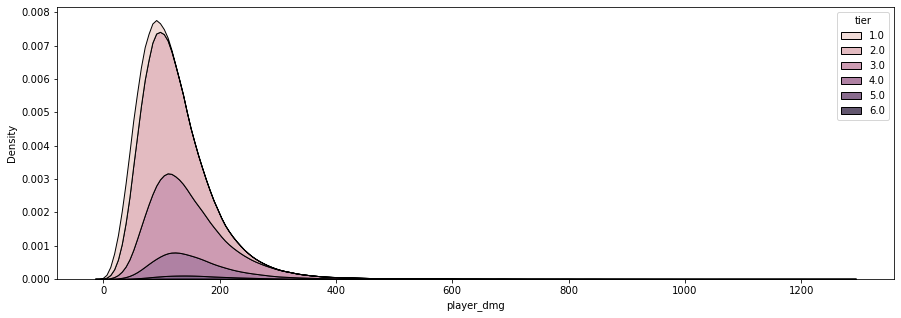

In [86]:
plt.figure(figsize=(15, 5))
sns.kdeplot(data=df, x='player_dmg', hue='tier', multiple='stack')

In [87]:
tier1 = stats.anderson(df.loc[df['tier'] == 1, 'player_dmg'], dist='norm')
tier2 = stats.anderson(df.loc[df['tier'] == 2, 'player_dmg'], dist='norm')
tier3 = stats.anderson(df.loc[df['tier'] == 3, 'player_dmg'], dist='norm')
tier4 = stats.anderson(df.loc[df['tier'] == 4, 'player_dmg'], dist='norm')
tier5 = stats.anderson(df.loc[df['tier'] == 5, 'player_dmg'], dist='norm')
tier6 = stats.anderson(df.loc[df['tier'] == 6, 'player_dmg'], dist='norm')

print('tier1:', tier1[0] < tier1[1][2], '\n' 
      'tier2:', tier2[0] < tier2[1][2], '\n'
      'tier3:', tier3[0] < tier3[1][2], '\n'
      'tier4:', tier4[0] < tier3[1][2], '\n'
      'tier5:', tier5[0] < tier3[1][2], '\n'
      'tier6:', tier6[0] < tier3[1][2], '\n')

tier1: False 
tier2: False 
tier3: False 
tier4: False 
tier5: False 
tier6: False 



In [88]:
stats.kruskal(df.loc[df['tier'] == 1, 'player_dmg'],
              df.loc[df['tier'] == 2, 'player_dmg'],
              df.loc[df['tier'] == 3, 'player_dmg'],
              df.loc[df['tier'] == 4, 'player_dmg'],
              df.loc[df['tier'] == 5, 'player_dmg'],
              df.loc[df['tier'] == 6, 'player_dmg'])

KruskalResult(statistic=116342.64740196442, pvalue=0.0)

In [89]:
sp.posthoc_conover(df, val_col ='player_dmg', 
                     group_col ='tier', p_adjust = 'holm').style.background_gradient(cmap='Blues')

,1.0,2.0,3.0,4.0,5.0,6.0
1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
4.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
5.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.017837
6.0,0.000000,0.000000,0.000000,0.000000,0.017837,1.000000


## player_assists
* Tier와 평균 assits 횟수는 비례함 

In [90]:
df.groupby('tier')['player_assists'].describe()

,count,mean,std,min,25%,50%,75%,max
tier,,,,,,,,
1.000,39512.000,0.121,0.116,0.000,0.000,0.100,0.200,1.000
2.000,233947.000,0.200,0.152,0.000,0.091,0.176,0.286,1.600
3.000,162370.000,0.249,0.160,0.000,0.136,0.217,0.326,1.900
4.000,48115.000,0.261,0.142,0.000,0.163,0.233,0.326,1.909
5.000,7272.000,0.281,0.136,0.000,0.187,0.255,0.345,1.464
6.000,667.000,0.293,0.134,0.038,0.200,0.264,0.359,0.897


<AxesSubplot:xlabel='tier', ylabel='player_assists'>

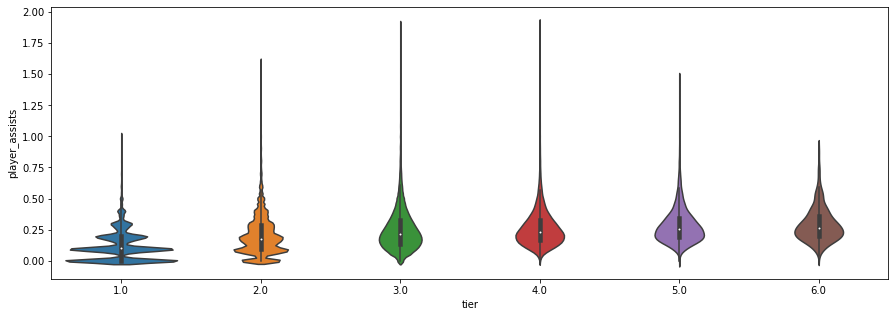

In [91]:
plt.figure(figsize=(15,5))
sns.violinplot(data=df, x='tier', y='player_assists')

<AxesSubplot:xlabel='player_assists', ylabel='Density'>

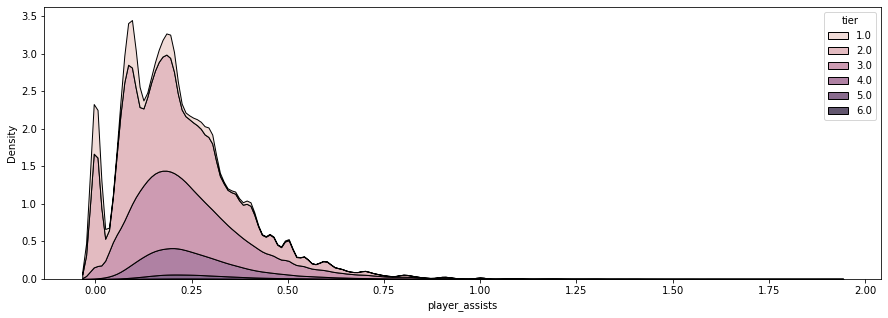

In [92]:
plt.figure(figsize=(15, 5))
sns.kdeplot(data=df, x='player_assists', hue='tier', multiple='stack')

In [93]:
tier1 = stats.anderson(df.loc[df['tier'] == 1, 'player_assists'], dist='norm')
tier2 = stats.anderson(df.loc[df['tier'] == 2, 'player_assists'], dist='norm')
tier3 = stats.anderson(df.loc[df['tier'] == 3, 'player_assists'], dist='norm')
tier4 = stats.anderson(df.loc[df['tier'] == 4, 'player_assists'], dist='norm')
tier5 = stats.anderson(df.loc[df['tier'] == 5, 'player_assists'], dist='norm')
tier6 = stats.anderson(df.loc[df['tier'] == 6, 'player_assists'], dist='norm')

print('tier1:', tier1[0] < tier1[1][2], '\n' 
      'tier2:', tier2[0] < tier2[1][2], '\n'
      'tier3:', tier3[0] < tier3[1][2], '\n'
      'tier4:', tier4[0] < tier3[1][2], '\n'
      'tier5:', tier5[0] < tier3[1][2], '\n'
      'tier6:', tier6[0] < tier3[1][2], '\n')

tier1: False 
tier2: False 
tier3: False 
tier4: False 
tier5: False 
tier6: False 



In [94]:
stats.kruskal(df.loc[df['tier'] == 1, 'player_assists'],
              df.loc[df['tier'] == 2, 'player_assists'],
              df.loc[df['tier'] == 3, 'player_assists'],
              df.loc[df['tier'] == 4, 'player_assists'],
              df.loc[df['tier'] == 5, 'player_assists'],
              df.loc[df['tier'] == 6, 'player_assists'])

KruskalResult(statistic=37250.70437335237, pvalue=0.0)

In [95]:
sp.posthoc_conover(df, val_col ='player_assists', 
                     group_col ='tier', p_adjust = 'holm').style.background_gradient(cmap='Blues')

,1.0,2.0,3.0,4.0,5.0,6.0
1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
4.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
5.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.036097
6.0,0.000000,0.000000,0.000000,0.000000,0.036097,1.000000


## player_dbno
* Tier와 평균 dbno 횟수는 비례함 

In [96]:
df.groupby('tier')['player_dbno'].mean().to_frame()

,player_dbno
tier,
1.000,0.255
2.000,0.503
3.000,0.690
4.000,0.767
5.000,0.834
6.000,0.875


<AxesSubplot:xlabel='player_dbno', ylabel='Density'>

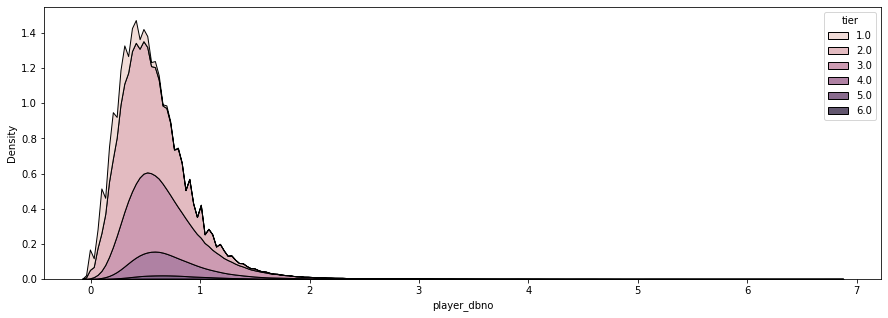

In [97]:
plt.figure(figsize=(15, 5))
sns.kdeplot(data=df, x='player_dbno', hue='tier', multiple='stack')

In [98]:
tier1 = stats.anderson(df.loc[df['tier'] == 1, 'player_dbno'], dist='norm')
tier2 = stats.anderson(df.loc[df['tier'] == 2, 'player_dbno'], dist='norm')
tier3 = stats.anderson(df.loc[df['tier'] == 3, 'player_dbno'], dist='norm')
tier4 = stats.anderson(df.loc[df['tier'] == 4, 'player_dbno'], dist='norm')
tier5 = stats.anderson(df.loc[df['tier'] == 5, 'player_dbno'], dist='norm')
tier6 = stats.anderson(df.loc[df['tier'] == 6, 'player_dbno'], dist='norm')

print('tier1:', tier1[0] < tier1[1][2], '\n' 
      'tier2:', tier2[0] < tier2[1][2], '\n'
      'tier3:', tier3[0] < tier3[1][2], '\n'
      'tier4:', tier4[0] < tier3[1][2], '\n'
      'tier5:', tier5[0] < tier3[1][2], '\n'
      'tier6:', tier6[0] < tier3[1][2], '\n')

tier1: False 
tier2: False 
tier3: False 
tier4: False 
tier5: False 
tier6: False 



In [99]:
stats.kruskal(df.loc[df['tier'] == 1, 'player_dbno'],
              df.loc[df['tier'] == 2, 'player_dbno'],
              df.loc[df['tier'] == 3, 'player_dbno'],
              df.loc[df['tier'] == 4, 'player_dbno'],
              df.loc[df['tier'] == 5, 'player_dbno'],
              df.loc[df['tier'] == 6, 'player_dbno'])

KruskalResult(statistic=91435.05774339203, pvalue=0.0)

In [100]:
sp.posthoc_conover(df, val_col ='player_dbno', 
                     group_col ='tier', p_adjust = 'holm').style.background_gradient(cmap='Blues')

,1.0,2.0,3.0,4.0,5.0,6.0
1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
4.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
5.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.007047
6.0,0.000000,0.000000,0.000000,0.000000,0.007047,1.000000


## kda
* Tier와 평균 kda는 비례함

In [101]:
df.groupby('tier')['kda'].describe()

,count,mean,std,min,25%,50%,75%,max
tier,,,,,,,,
1.000,39512.000,0.450,0.255,0.000,0.273,0.417,0.600,1.900
2.000,233947.000,0.954,0.496,0.000,0.600,0.875,1.222,5.167
3.000,162370.000,1.353,0.807,0.000,0.815,1.172,1.682,17.250
4.000,48115.000,1.521,1.194,0.000,0.926,1.282,1.788,105.000
5.000,7272.000,1.674,1.115,0.000,1.044,1.427,2.000,20.222
6.000,667.000,1.786,1.310,0.342,1.101,1.555,2.124,14.864


<AxesSubplot:xlabel='tier', ylabel='kda'>

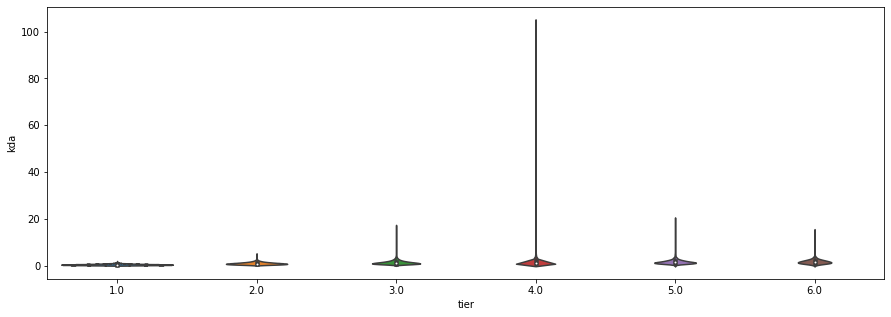

In [102]:
plt.figure(figsize=(15,5))
sns.violinplot(data=df, x='tier', y='kda')

<AxesSubplot:xlabel='kda', ylabel='Density'>

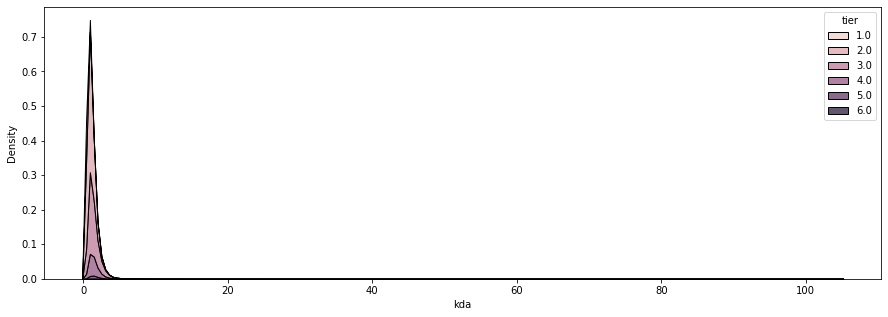

In [103]:
plt.figure(figsize=(15, 5))
sns.kdeplot(data=df, x='kda', hue='tier', multiple='stack')

In [104]:
tier1 = stats.anderson(df.loc[df['tier'] == 1, 'kda'], dist='norm')
tier2 = stats.anderson(df.loc[df['tier'] == 2, 'kda'], dist='norm')
tier3 = stats.anderson(df.loc[df['tier'] == 3, 'kda'], dist='norm')
tier4 = stats.anderson(df.loc[df['tier'] == 4, 'kda'], dist='norm')
tier5 = stats.anderson(df.loc[df['tier'] == 5, 'kda'], dist='norm')
tier6 = stats.anderson(df.loc[df['tier'] == 6, 'kda'], dist='norm')

print('tier1:', tier1[0] < tier1[1][2], '\n' 
      'tier2:', tier2[0] < tier2[1][2], '\n'
      'tier3:', tier3[0] < tier3[1][2], '\n'
      'tier4:', tier4[0] < tier3[1][2], '\n'
      'tier5:', tier5[0] < tier3[1][2], '\n'
      'tier6:', tier6[0] < tier3[1][2], '\n')

tier1: False 
tier2: False 
tier3: False 
tier4: False 
tier5: False 
tier6: False 



In [105]:
stats.kruskal(df.loc[df['tier'] == 1, 'kda'],
              df.loc[df['tier'] == 2, 'kda'],
              df.loc[df['tier'] == 3, 'kda'],
              df.loc[df['tier'] == 4, 'kda'],
              df.loc[df['tier'] == 5, 'kda'],
              df.loc[df['tier'] == 6, 'kda'])

KruskalResult(statistic=102544.82709100135, pvalue=0.0)

In [106]:
sp.posthoc_conover(df, val_col ='kda', 
                     group_col ='tier', p_adjust = 'holm').style.background_gradient(cmap='Blues')

,1.0,2.0,3.0,4.0,5.0,6.0
1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
4.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
5.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.013054
6.0,0.000000,0.000000,0.000000,0.000000,0.013054,1.000000


## player_dist_walk
* Tier 1~3 에서 평균 거리가 증가
* Tier 3~6 에서는 거리가 감소
* Tier 2와 5는 평균의 차이가 없음

In [107]:
df.groupby('tier')['player_dist_walk'].describe()

,count,mean,std,min,25%,50%,75%,max
tier,,,,,,,,
1.000,39512.000,869.150,331.664,0.000,628.431,838.463,1076.796,3045.617
2.000,233947.000,1145.747,372.006,0.000,879.324,1112.323,1375.415,3557.444
3.000,162370.000,1216.736,361.111,22.408,960.163,1180.451,1433.507,3556.210
4.000,48115.000,1186.687,331.421,1.571,955.302,1148.594,1373.095,3660.514
5.000,7272.000,1163.218,315.668,104.237,941.888,1122.241,1345.288,2956.214
6.000,667.000,1146.015,301.586,429.695,945.398,1104.615,1308.282,2538.361


<AxesSubplot:xlabel='tier', ylabel='player_dist_walk'>

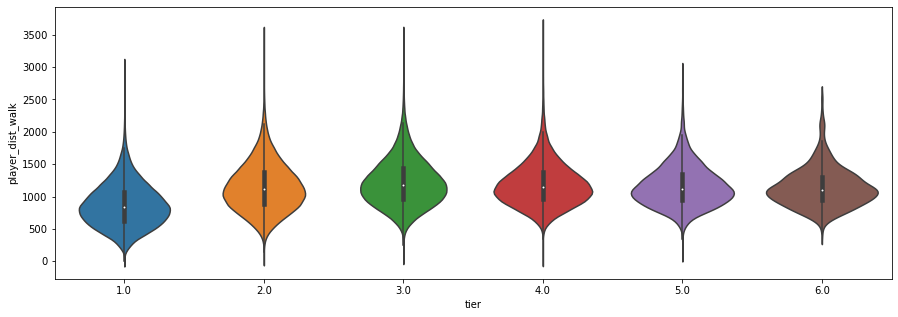

In [108]:
plt.figure(figsize=(15,5))
sns.violinplot(data=df, x='tier', y='player_dist_walk')

<AxesSubplot:xlabel='player_dist_walk', ylabel='Density'>

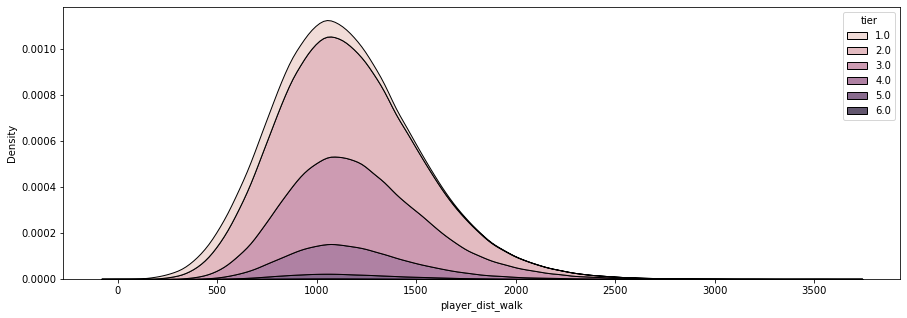

In [109]:
plt.figure(figsize=(15, 5))
sns.kdeplot(data=df, x='player_dist_walk', hue='tier', multiple='stack')

In [110]:
tier1 = stats.anderson(df.loc[df['tier'] == 1, 'player_dist_walk'], dist='norm')
tier2 = stats.anderson(df.loc[df['tier'] == 2, 'player_dist_walk'], dist='norm')
tier3 = stats.anderson(df.loc[df['tier'] == 3, 'player_dist_walk'], dist='norm')
tier4 = stats.anderson(df.loc[df['tier'] == 4, 'player_dist_walk'], dist='norm')
tier5 = stats.anderson(df.loc[df['tier'] == 5, 'player_dist_walk'], dist='norm')
tier6 = stats.anderson(df.loc[df['tier'] == 6, 'player_dist_walk'], dist='norm')

print('tier1:', tier1[0] < tier1[1][2], '\n' 
      'tier2:', tier2[0] < tier2[1][2], '\n'
      'tier3:', tier3[0] < tier3[1][2], '\n'
      'tier4:', tier4[0] < tier3[1][2], '\n'
      'tier5:', tier5[0] < tier3[1][2], '\n'
      'tier6:', tier6[0] < tier3[1][2], '\n')

tier1: False 
tier2: False 
tier3: False 
tier4: False 
tier5: False 
tier6: False 



In [111]:
stats.kruskal(df.loc[df['tier'] == 1, 'player_dist_walk'],
              df.loc[df['tier'] == 2, 'player_dist_walk'],
              df.loc[df['tier'] == 3, 'player_dist_walk'],
              df.loc[df['tier'] == 4, 'player_dist_walk'],
              df.loc[df['tier'] == 5, 'player_dist_walk'],
              df.loc[df['tier'] == 6, 'player_dist_walk'])

KruskalResult(statistic=28086.373036560617, pvalue=0.0)

In [112]:
sp.posthoc_conover(df, val_col ='player_kills', 
                     group_col ='tier', p_adjust = 'holm').style.background_gradient(cmap='Blues')

,1.0,2.0,3.0,4.0,5.0,6.0
1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
4.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
5.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.008726
6.0,0.000000,0.000000,0.000000,0.000000,0.008726,1.000000


## player_dist_ride
* Tier 1에서는 확실히 탈것을 활용한 이동 거리가 짧음
* Tier 2부터는 그룹간의 차이가 있긴하는하지만, tier와 탈것을 활용한 이동 거리가 정비례 하지는 않음

In [113]:
df.groupby('tier')['player_dist_ride'].describe()

,count,mean,std,min,25%,50%,75%,max
tier,,,,,,,,
1.000,39512.000,757.750,550.327,0.000,350.870,657.042,1049.198,4727.912
2.000,233947.000,1092.852,668.710,0.000,611.497,977.059,1443.444,7518.677
3.000,162370.000,1207.519,659.123,0.000,741.388,1087.587,1537.859,7930.959
4.000,48115.000,1216.130,625.658,0.000,783.682,1096.282,1508.031,6412.698
5.000,7272.000,1231.058,616.637,0.000,800.418,1104.539,1510.474,6067.759
6.000,667.000,1214.897,624.687,226.440,783.268,1074.015,1490.459,5221.821


<AxesSubplot:xlabel='tier', ylabel='player_dist_ride'>

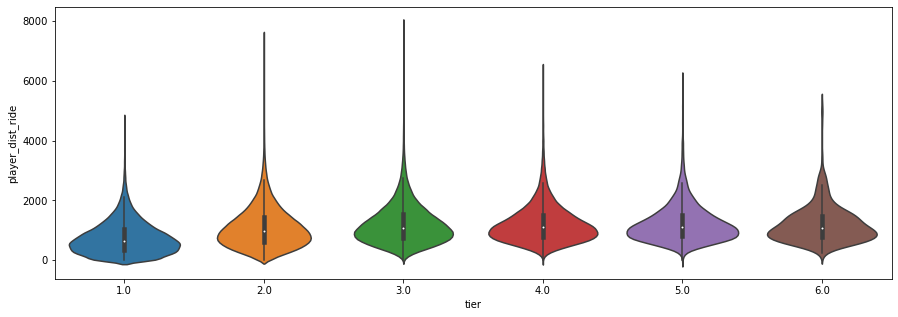

In [114]:
plt.figure(figsize=(15,5))
sns.violinplot(data=df, x='tier', y='player_dist_ride')

<AxesSubplot:xlabel='player_dist_ride', ylabel='Density'>

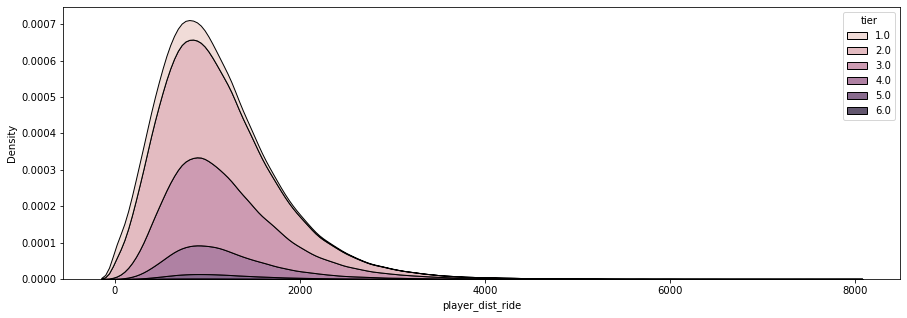

In [115]:
plt.figure(figsize=(15, 5))
sns.kdeplot(data=df, x='player_dist_ride', hue='tier', multiple='stack')

In [116]:
tier1 = stats.anderson(df.loc[df['tier'] == 1, 'player_dist_ride'], dist='norm')
tier2 = stats.anderson(df.loc[df['tier'] == 2, 'player_dist_ride'], dist='norm')
tier3 = stats.anderson(df.loc[df['tier'] == 3, 'player_dist_ride'], dist='norm')
tier4 = stats.anderson(df.loc[df['tier'] == 4, 'player_dist_ride'], dist='norm')
tier5 = stats.anderson(df.loc[df['tier'] == 5, 'player_dist_ride'], dist='norm')
tier6 = stats.anderson(df.loc[df['tier'] == 6, 'player_dist_ride'], dist='norm')

print('tier1:', tier1[0] < tier1[1][2], '\n' 
      'tier2:', tier2[0] < tier2[1][2], '\n'
      'tier3:', tier3[0] < tier3[1][2], '\n'
      'tier4:', tier4[0] < tier3[1][2], '\n'
      'tier5:', tier5[0] < tier3[1][2], '\n'
      'tier6:', tier6[0] < tier3[1][2], '\n')

tier1: False 
tier2: False 
tier3: False 
tier4: False 
tier5: False 
tier6: False 



In [117]:
stats.kruskal(df.loc[df['tier'] == 1, 'player_dist_ride'],
              df.loc[df['tier'] == 2, 'player_dist_ride'],
              df.loc[df['tier'] == 3, 'player_dist_ride'],
              df.loc[df['tier'] == 4, 'player_dist_ride'],
              df.loc[df['tier'] == 5, 'player_dist_ride'],
              df.loc[df['tier'] == 6, 'player_dist_ride'])

KruskalResult(statistic=20378.539854581883, pvalue=0.0)

In [118]:
sp.posthoc_conover(df, val_col ='player_dist_ride', 
                     group_col ='tier', p_adjust = 'holm').style.background_gradient(cmap='Blues')

,1.0,2.0,3.0,4.0,5.0,6.0
1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3.0,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
4.0,0.000000,0.000000,0.000000,1.000000,0.061314,1.000000
5.0,0.000000,0.000000,0.000000,0.061314,1.000000,1.000000
6.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000


## kill_dist
* Tier가 높다고 kill_dist가 비례하여 커지는건 아니지만, 1~2/3~6은 구분되는 것처럼 보임

In [119]:
df.groupby('tier')['kill_dist'].describe()

,count,mean,std,min,25%,50%,75%,max
tier,,,,,,,,
1.000,37085.000,2291.038,2713.455,0.000,634.187,1379.069,2908.845,39483.231
2.000,233180.000,2976.333,2177.440,0.000,1444.610,2458.804,3932.369,35431.702
3.000,162345.000,3283.141,1757.178,0.000,2025.564,2956.776,4175.966,21508.079
4.000,48112.000,3286.281,1491.969,166.125,2257.772,3024.359,4009.083,16075.735
5.000,7271.000,3237.264,1308.057,298.893,2363.807,3031.629,3863.627,16516.244
6.000,667.000,3162.739,1272.446,820.842,2359.082,2975.492,3685.891,11571.503


([<matplotlib.axis.XTick at 0x7f96fdac20d0>,
 [Text(0, 0, 'Bronze'),
  Text(1, 0, 'Silver'),
  Text(2, 0, 'Gold'),
  Text(3, 0, 'Platinum'),
  Text(4, 0, 'Diamond'),
  Text(5, 0, 'Master')])

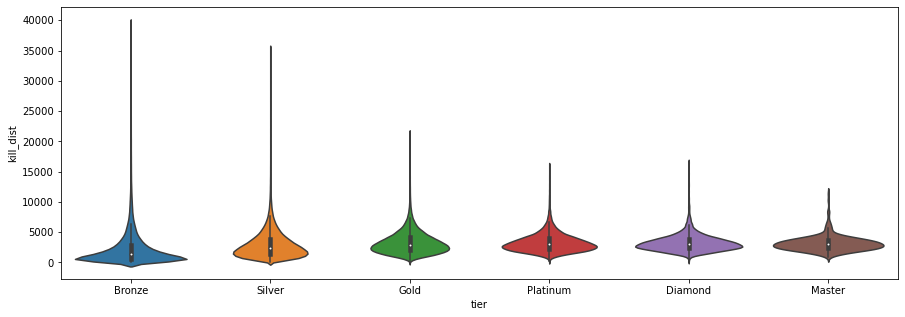

In [120]:
plt.figure(figsize=(15,5))
sns.violinplot(data=df, x='tier', y='kill_dist')
plt.xticks(np.arange(6), ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master'])

<AxesSubplot:xlabel='kill_dist', ylabel='Density'>

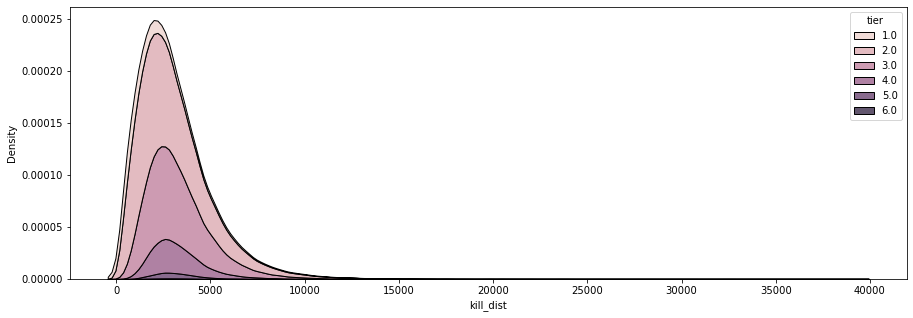

In [121]:
plt.figure(figsize=(15, 5))
sns.kdeplot(data=df, x='kill_dist', hue='tier', multiple='stack')

In [122]:
tier1 = stats.anderson(df.loc[df['tier'] == 1, 'kill_dist'], dist='norm')
tier2 = stats.anderson(df.loc[df['tier'] == 2, 'kill_dist'], dist='norm')
tier3 = stats.anderson(df.loc[df['tier'] == 3, 'kill_dist'], dist='norm')
tier4 = stats.anderson(df.loc[df['tier'] == 4, 'kill_dist'], dist='norm')
tier5 = stats.anderson(df.loc[df['tier'] == 5, 'kill_dist'], dist='norm')
tier6 = stats.anderson(df.loc[df['tier'] == 6, 'kill_dist'], dist='norm')

print('tier1:', tier1[0] < tier1[1][2], '\n' 
      'tier2:', tier2[0] < tier2[1][2], '\n'
      'tier3:', tier3[0] < tier3[1][2], '\n'
      'tier4:', tier4[0] < tier3[1][2], '\n'
      'tier5:', tier5[0] < tier3[1][2], '\n'
      'tier6:', tier6[0] < tier3[1][2], '\n')

tier1: False 
tier2: False 
tier3: False 
tier4: False 
tier5: False 
tier6: False 



In [123]:
stats.kruskal(df.loc[df['tier'] == 1, 'kill_dist'].fillna(0),
              df.loc[df['tier'] == 2, 'kill_dist'].fillna(0),
              df.loc[df['tier'] == 3, 'kill_dist'].fillna(0),
              df.loc[df['tier'] == 4, 'kill_dist'].fillna(0),
              df.loc[df['tier'] == 5, 'kill_dist'].fillna(0),
              df.loc[df['tier'] == 6, 'kill_dist'].fillna(0))

KruskalResult(statistic=29480.342121987087, pvalue=0.0)

In [124]:
sp.posthoc_conover(df, val_col ='kill_dist', 
                     group_col ='tier', p_adjust = 'holm').style.background_gradient(cmap='Blues')

,1.0,2.0,3.0,4.0,5.0,6.0
1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3.0,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
4.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
5.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
6.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000


## player_survive_time
* 확실히 높은 티어일수록 1500초 이상 살아있는 경우가 많음

In [125]:
df.groupby('tier')['player_survive_time'].describe()

,count,mean,std,min,25%,50%,75%,max
tier,,,,,,,,
1.000,39512.000,585.483,163.664,129.501,467.896,575.700,692.329,1320.811
2.000,233947.000,730.444,182.290,160.427,600.837,719.385,848.277,1592.046
3.000,162370.000,772.982,180.279,235.110,644.891,759.026,885.045,1714.289
4.000,48115.000,763.492,171.562,307.477,642.441,745.021,864.796,1788.008
5.000,7272.000,756.397,169.746,291.271,635.603,736.954,855.121,1632.619
6.000,667.000,746.533,168.778,313.350,628.640,731.549,839.671,1485.754


<AxesSubplot:xlabel='tier', ylabel='player_survive_time'>

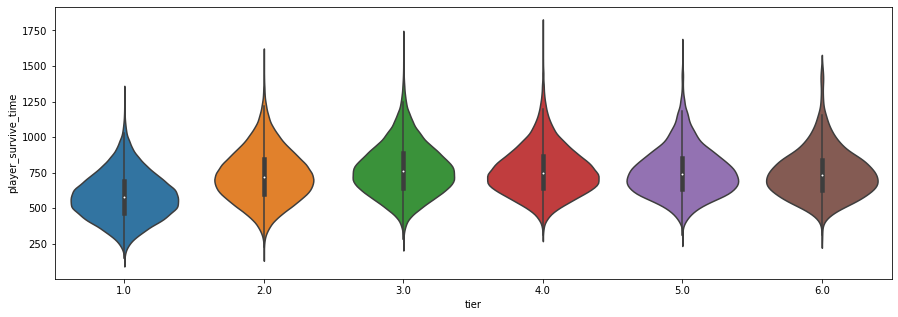

In [126]:
plt.figure(figsize=(15,5))
sns.violinplot(data=df, x='tier', y='player_survive_time')

<AxesSubplot:xlabel='player_survive_time', ylabel='Density'>

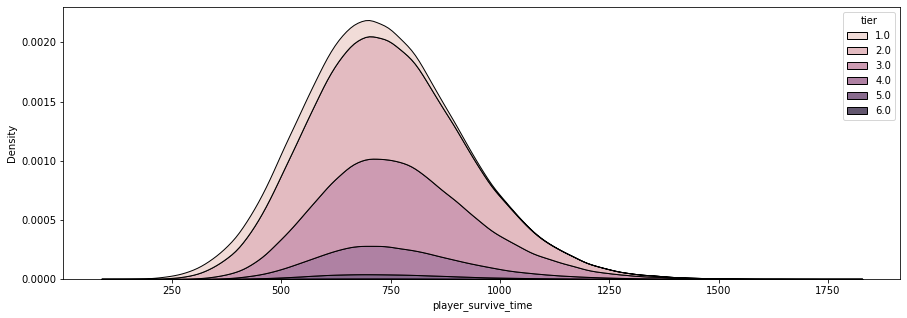

In [127]:
plt.figure(figsize=(15, 5))
sns.kdeplot(data=df, x='player_survive_time', hue='tier', multiple='stack')

In [128]:
tier1 = stats.anderson(df.loc[df['tier'] == 1, 'player_survive_time'], dist='norm')
tier2 = stats.anderson(df.loc[df['tier'] == 2, 'player_survive_time'], dist='norm')
tier3 = stats.anderson(df.loc[df['tier'] == 3, 'player_survive_time'], dist='norm')
tier4 = stats.anderson(df.loc[df['tier'] == 4, 'player_survive_time'], dist='norm')
tier5 = stats.anderson(df.loc[df['tier'] == 5, 'player_survive_time'], dist='norm')
tier6 = stats.anderson(df.loc[df['tier'] == 6, 'player_survive_time'], dist='norm')

print('tier1:', tier1[0] < tier1[1][2], '\n' 
      'tier2:', tier2[0] < tier2[1][2], '\n'
      'tier3:', tier3[0] < tier3[1][2], '\n'
      'tier4:', tier4[0] < tier3[1][2], '\n'
      'tier5:', tier5[0] < tier3[1][2], '\n'
      'tier6:', tier6[0] < tier3[1][2], '\n')

tier1: False 
tier2: False 
tier3: False 
tier4: False 
tier5: False 
tier6: False 



In [129]:
stats.kruskal(df.loc[df['tier'] == 1, 'player_survive_time'],
              df.loc[df['tier'] == 2, 'player_survive_time'],
              df.loc[df['tier'] == 3, 'player_survive_time'],
              df.loc[df['tier'] == 4, 'player_survive_time'],
              df.loc[df['tier'] == 5, 'player_survive_time'],
              df.loc[df['tier'] == 6, 'player_survive_time'])

KruskalResult(statistic=32061.50682546851, pvalue=0.0)

In [130]:
sp.posthoc_conover(df, val_col ='player_kills', 
                     group_col ='tier', p_adjust = 'holm').style.background_gradient(cmap='Blues')

,1.0,2.0,3.0,4.0,5.0,6.0
1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
4.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
5.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.008726
6.0,0.000000,0.000000,0.000000,0.000000,0.008726,1.000000


## team_placement
* Tier 1은 확실히 낮은 등수를 기록하는 경우가 많음

In [131]:
df.groupby('tier')['team_placement'].describe()

,count,mean,std,min,25%,50%,75%,max
tier,,,,,,,,
1.000,39512.000,29.700,4.274,11.700,26.800,29.800,32.727,43.800
2.000,233947.000,25.536,4.573,5.800,22.467,25.667,28.727,41.875
3.000,162370.000,24.514,4.471,3.583,21.600,24.718,27.667,40.467
4.000,48115.000,24.745,4.263,1.818,22.118,25.047,27.727,38.540
5.000,7272.000,24.882,4.227,4.925,22.305,25.146,27.858,36.651
6.000,667.000,25.142,4.200,7.568,22.664,25.582,28.121,35.640


<AxesSubplot:xlabel='tier', ylabel='team_placement'>

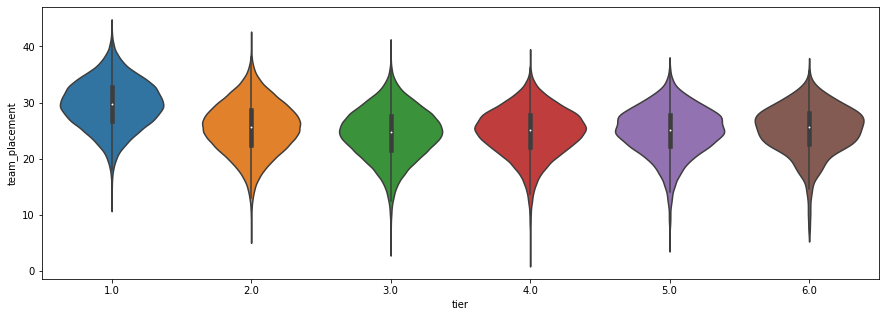

In [132]:
plt.figure(figsize=(15,5))
sns.violinplot(data=df, x='tier', y='team_placement')

In [133]:
tier1 = stats.anderson(df.loc[df['tier'] == 1, 'team_placement'], dist='norm')
tier2 = stats.anderson(df.loc[df['tier'] == 2, 'team_placement'], dist='norm')
tier3 = stats.anderson(df.loc[df['tier'] == 3, 'team_placement'], dist='norm')
tier4 = stats.anderson(df.loc[df['tier'] == 4, 'team_placement'], dist='norm')
tier5 = stats.anderson(df.loc[df['tier'] == 5, 'team_placement'], dist='norm')
tier6 = stats.anderson(df.loc[df['tier'] == 6, 'team_placement'], dist='norm')

print('tier1:', tier1[0] < tier1[1][2], '\n' 
      'tier2:', tier2[0] < tier2[1][2], '\n'
      'tier3:', tier3[0] < tier3[1][2], '\n'
      'tier4:', tier4[0] < tier3[1][2], '\n'
      'tier5:', tier5[0] < tier3[1][2], '\n'
      'tier6:', tier6[0] < tier3[1][2], '\n')

tier1: False 
tier2: False 
tier3: False 
tier4: False 
tier5: False 
tier6: False 



In [134]:
stats.kruskal(df.loc[df['tier'] == 1, 'team_placement'],
              df.loc[df['tier'] == 2, 'team_placement'],
              df.loc[df['tier'] == 3, 'team_placement'],
              df.loc[df['tier'] == 4, 'team_placement'],
              df.loc[df['tier'] == 5, 'team_placement'],
              df.loc[df['tier'] == 6, 'team_placement'])

KruskalResult(statistic=36233.39092665878, pvalue=0.0)

In [135]:
sp.posthoc_conover(df, val_col ='team_placement', 
                     group_col ='tier', p_adjust = 'holm').style.background_gradient(cmap='Blues')

,1.0,2.0,3.0,4.0,5.0,6.0
1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.176605
3.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000240
4.0,0.000000,0.000000,0.000000,1.000000,0.027206,0.027206
5.0,0.000000,0.000000,0.000000,0.027206,1.000000,0.176605
6.0,0.000000,0.176605,0.000240,0.027206,0.176605,1.000000


## num_of_match

In [136]:
# df_tier = pd.read_csv('../dataset/duo/duo_tier.csv')

df_tier = pd.read_csv('../Nanodegree/Projects/01. PUBG/dataset/duo_tier.csv')

In [137]:
df_tier.columns

Index(['game_size', 'match_id', 'player_assists', 'player_dbno',
       'player_dist_ride', 'player_dist_walk', 'player_dmg', 'player_kills',
       'player_name', 'player_survive_time', 'team_id', 'team_placement',
       'killed_by', 'killer_placement', 'killer_position_x',
       'killer_position_y', 'map', 'time', 'victim_name', 'victim_placement',
       'victim_position_x', 'victim_position_y', 'kill_dist', 'dates',
       'each_game_score', 'total_score', 'tier', 'kda'],
      dtype='object')

In [138]:
df.groupby('tier')['num_of_match'].describe()

,count,mean,std,min,25%,50%,75%,max
tier,,,,,,,,
1.000,39512.000,10.995,1.327,10.000,10.000,11.000,12.000,36.000
2.000,233947.000,13.740,3.382,10.000,11.000,13.000,16.000,44.000
3.000,162370.000,23.314,7.814,10.000,18.000,22.000,28.000,88.000
4.000,48115.000,45.543,14.927,10.000,35.000,44.000,54.000,128.000
5.000,7272.000,88.560,29.533,17.000,68.000,85.000,104.250,374.000
6.000,667.000,193.790,82.006,42.000,139.500,175.000,227.500,759.000


<AxesSubplot:xlabel='tier', ylabel='num_of_match'>

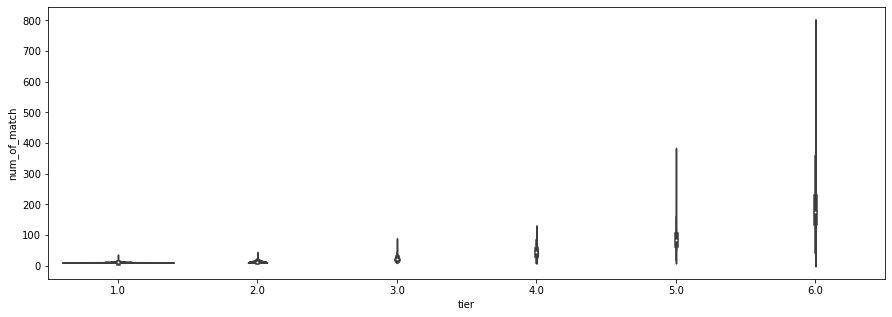

In [139]:
plt.figure(figsize=(15,5))
sns.violinplot(data=df, x='tier', y='num_of_match')

In [140]:
tier1 = stats.anderson(df.loc[df['tier'] == 1, 'num_of_match'], dist='norm')
tier2 = stats.anderson(df.loc[df['tier'] == 2, 'num_of_match'], dist='norm')
tier3 = stats.anderson(df.loc[df['tier'] == 3, 'num_of_match'], dist='norm')
tier4 = stats.anderson(df.loc[df['tier'] == 4, 'num_of_match'], dist='norm')
tier5 = stats.anderson(df.loc[df['tier'] == 5, 'num_of_match'], dist='norm')
tier6 = stats.anderson(df.loc[df['tier'] == 6, 'num_of_match'], dist='norm')

print('tier1:', tier1[0] < tier1[1][2], '\n' 
      'tier2:', tier2[0] < tier2[1][2], '\n'
      'tier3:', tier3[0] < tier3[1][2], '\n'
      'tier4:', tier4[0] < tier3[1][2], '\n'
      'tier5:', tier5[0] < tier3[1][2], '\n'
      'tier6:', tier6[0] < tier3[1][2], '\n')

tier1: False 
tier2: False 
tier3: False 
tier4: False 
tier5: False 
tier6: False 



In [141]:
stats.kruskal(df.loc[df['tier'] == 1, 'num_of_match'],
              df.loc[df['tier'] == 2, 'num_of_match'],
              df.loc[df['tier'] == 3, 'num_of_match'],
              df.loc[df['tier'] == 4, 'num_of_match'],
              df.loc[df['tier'] == 5, 'num_of_match'],
              df.loc[df['tier'] == 6, 'num_of_match'])

KruskalResult(statistic=306008.05844217556, pvalue=0.0)

In [142]:
sp.posthoc_conover(df, val_col ='num_of_match', 
                     group_col ='tier', p_adjust = 'holm').style.background_gradient(cmap='Blues')

,1.0,2.0,3.0,4.0,5.0,6.0
1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
4.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
5.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.027498
6.0,0.000000,0.000000,0.000000,0.000000,0.027498,1.000000


## killed_by

<AxesSubplot:xlabel='count', ylabel='killed_by'>

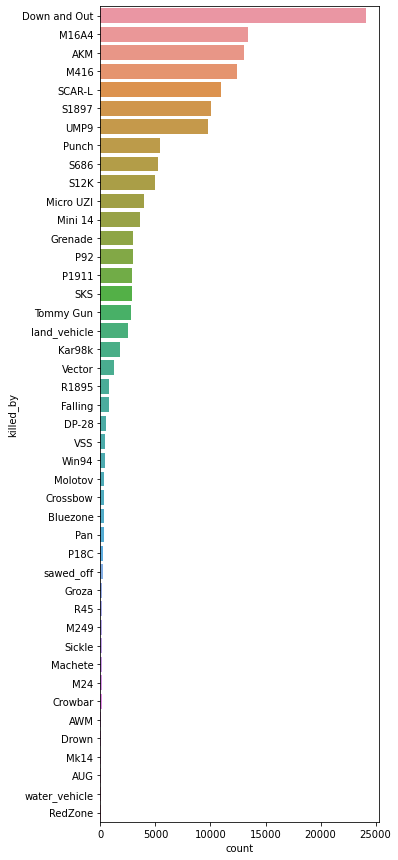

In [143]:
plt.figure(figsize=(5, 15))
sns.countplot(data=df_tier[df_tier['tier']==1], y='killed_by', 
              order=df_tier.loc[df_tier['tier']==1, 'killed_by'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='killed_by'>

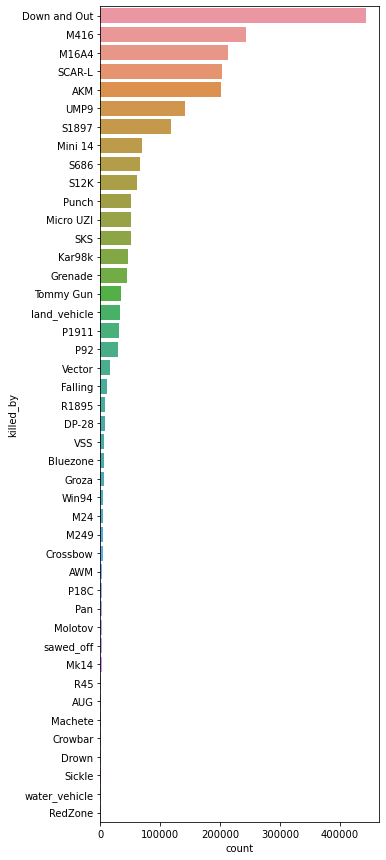

In [144]:
plt.figure(figsize=(5, 15))
sns.countplot(data=df_tier[df_tier['tier']==2], y='killed_by',
              order=df_tier.loc[df_tier['tier']==2, 'killed_by'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='killed_by'>

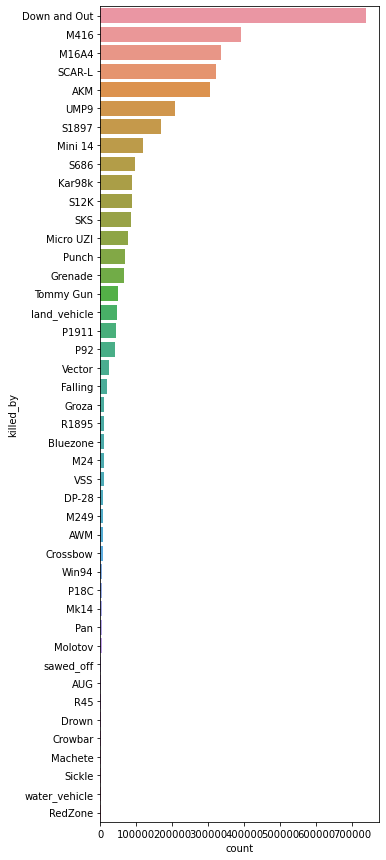

In [145]:
plt.figure(figsize=(5, 15))
sns.countplot(data=df_tier[df_tier['tier']==3], y='killed_by',
              order=df_tier.loc[df_tier['tier']==3, 'killed_by'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='killed_by'>

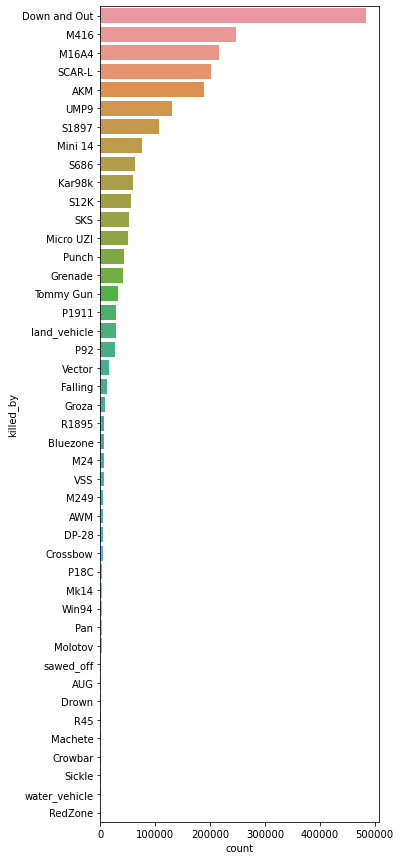

In [146]:
plt.figure(figsize=(5, 15))
sns.countplot(data=df_tier[df_tier['tier']==4], y='killed_by',
              order=df_tier.loc[df_tier['tier']==4, 'killed_by'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='killed_by'>

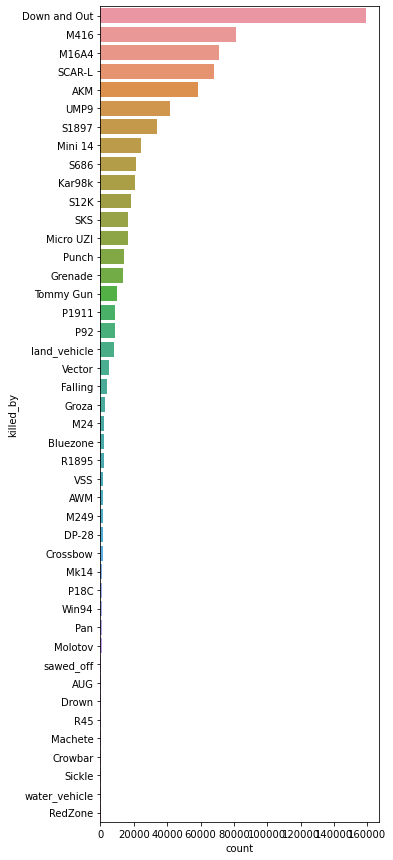

In [147]:
plt.figure(figsize=(5, 15))
sns.countplot(data=df_tier[df_tier['tier']==5], y='killed_by',
              order=df_tier.loc[df_tier['tier']==5, 'killed_by'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='killed_by'>

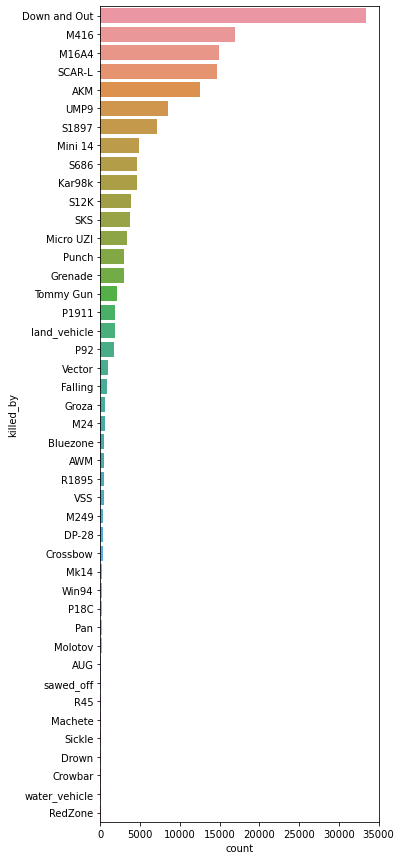

In [148]:
plt.figure(figsize=(5, 15))
sns.countplot(data=df_tier[df_tier['tier']==6], y='killed_by',
              order=df_tier.loc[df_tier['tier']==6, 'killed_by'].value_counts().index)

## time

In [149]:
first_kill_time = df_tier.groupby(['match_id', 'player_name'])[['tier', 'time']].first()

In [150]:
first_kill_time = first_kill_time[first_kill_time['time'].isnull()==False]

In [151]:
first_kill_time.groupby('tier')['time'].describe()

,count,mean,std,min,25%,50%,75%,max
tier,,,,,,,,
1,100924.000,478.871,432.094,63.000,160.000,282.000,682.000,1912.000
2,1222172.000,577.749,487.291,57.000,180.000,368.000,898.000,2038.000
3,1663699.000,595.041,499.705,58.000,182.000,381.000,938.000,1976.000
4,1021150.000,578.459,497.447,58.000,175.000,359.000,904.000,1943.000
5,317628.000,565.184,495.311,56.000,170.000,342.000,875.000,1926.000
6,65200.000,550.912,490.265,63.000,165.000,328.000,845.000,1924.000


In [152]:
first_kill_time.groupby('tier')['time'].median()

tier
1   282.000
2   368.000
3   381.000
4   359.000
5   342.000
6   328.000
Name: time, dtype: float64

<AxesSubplot:xlabel='tier', ylabel='time'>

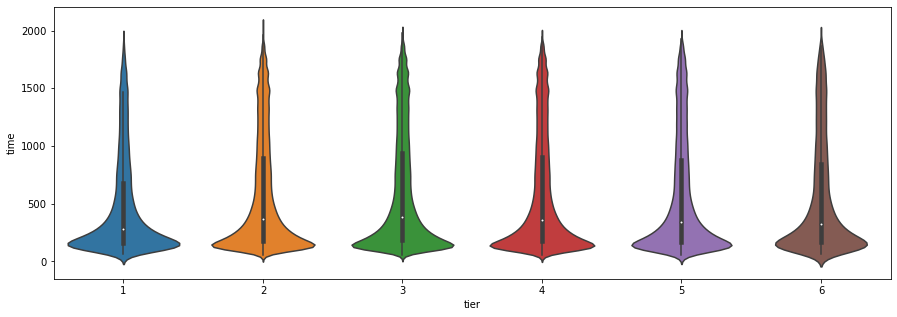

In [153]:
plt.figure(figsize=(15,5))
sns.violinplot(data=first_kill_time, x='tier', y='time')

In [154]:
df_tier.groupby('tier')['time'].describe()

,count,mean,std,min,25%,50%,75%,max
tier,,,,,,,,
1,142201.000,498.939,442.361,63.000,166.000,300.000,725.000,1912.000
2,2229623.000,633.115,508.834,57.000,198.000,433.000,1008.000,2038.000
3,3479327.000,673.773,527.856,58.000,208.000,482.000,1091.000,1976.000
4,2233347.000,664.695,529.513,58.000,202.000,464.000,1078.000,1997.000
5,725629.000,656.784,530.850,56.000,197.000,449.000,1066.000,1926.000
6,153204.000,645.741,529.185,63.000,191.000,431.000,1046.000,1924.000


<AxesSubplot:xlabel='tier', ylabel='time'>

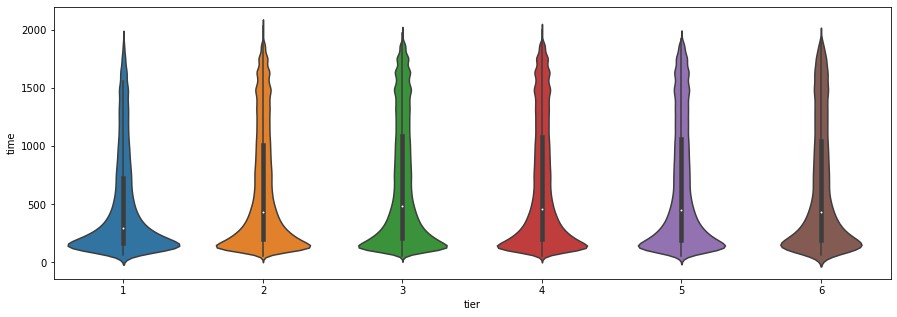

In [155]:
plt.figure(figsize=(15,5))
sns.violinplot(data=df_tier, x='tier', y='time')

In [156]:
df_tier.columns

Index(['game_size', 'match_id', 'player_assists', 'player_dbno',
       'player_dist_ride', 'player_dist_walk', 'player_dmg', 'player_kills',
       'player_name', 'player_survive_time', 'team_id', 'team_placement',
       'killed_by', 'killer_placement', 'killer_position_x',
       'killer_position_y', 'map', 'time', 'victim_name', 'victim_placement',
       'victim_position_x', 'victim_position_y', 'kill_dist', 'dates',
       'each_game_score', 'total_score', 'tier', 'kda'],
      dtype='object')

# Tier별 Median 비교

In [157]:
median = pd.DataFrame(df.groupby('tier').median())

In [158]:
median = median.reset_index(drop=False)

In [159]:
median

,tier,player_kills,player_dmg,player_assists,player_dbno,kda,player_dist_walk,player_dist_ride,kill_dist,player_survive_time,team_placement,num_of_match
0,1.000,0.300,52.833,0.100,0.231,0.417,838.463,657.042,1379.069,575.700,29.800,11
1,2.000,0.667,100.700,0.176,0.462,0.875,1112.323,977.059,2458.804,719.385,25.667,13
2,3.000,0.923,131.538,0.217,0.615,1.172,1180.451,1087.587,2956.776,759.026,24.718,22
3,4.000,1.021,142.800,0.233,0.674,1.282,1148.594,1096.282,3024.359,745.021,25.047,44
4,5.000,1.142,156.502,0.255,0.745,1.427,1122.241,1104.539,3031.629,736.954,25.146,85
5,6.000,1.250,165.968,0.264,0.815,1.555,1104.615,1074.015,2975.492,731.549,25.582,175


In [172]:
median.shape

(6, 12)

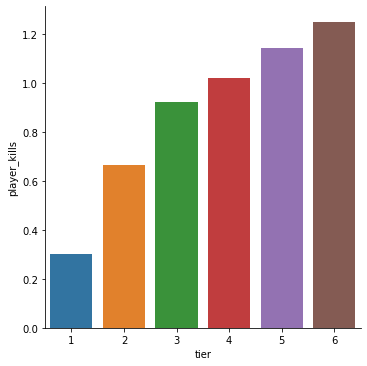

In [33]:
sns.catplot(data=median, y='player_kills', kind='bar', x='tier')

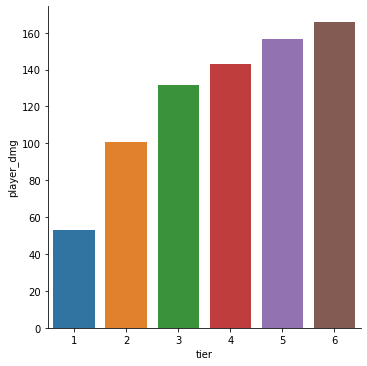

In [34]:
sns.catplot(data=median, y='player_dmg', kind='bar', x='tier')

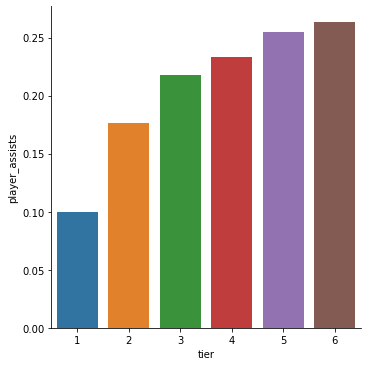

In [35]:
sns.catplot(data=median, y='player_assists', kind='bar', x='tier')

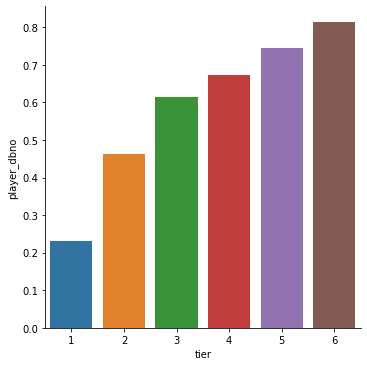

In [36]:
sns.catplot(data=median, y='player_dbno', kind='bar', x='tier')

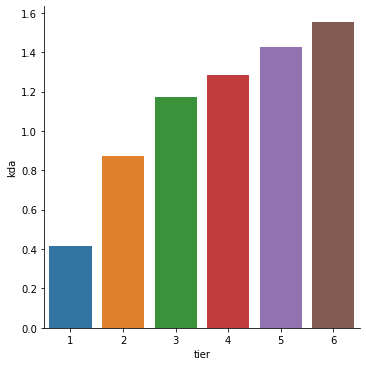

In [37]:
sns.catplot(data=median, y='kda', kind='bar', x='tier')

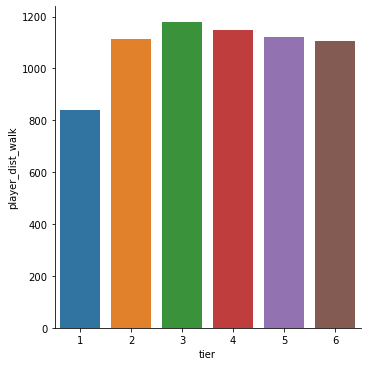

In [38]:
sns.catplot(data=median, y='player_dist_walk', kind='bar', x='tier')

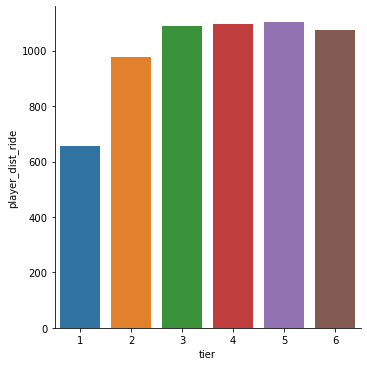

In [39]:
sns.catplot(data=median, y='player_dist_ride', kind='bar', x='tier')

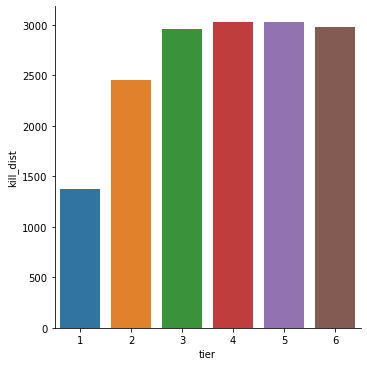

In [40]:
sns.catplot(data=median, y='kill_dist', kind='bar', x='tier')

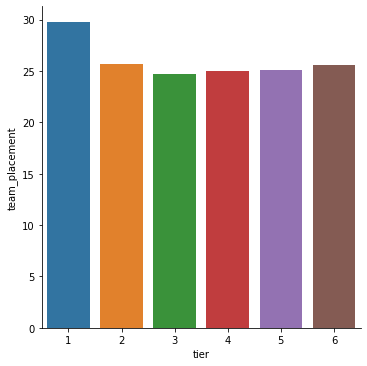

In [41]:
sns.catplot(data=median, y='team_placement', kind='bar', x='tier')

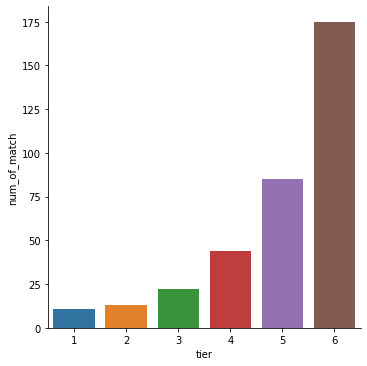

In [42]:
sns.catplot(data=median, y='num_of_match', kind='bar', x='tier')

##  Column 모아서 그리기

In [185]:
median_melt = pd.melt(median, id_vars='tier')
median_melt

,tier,variable,value
0,1.000,player_kills,0.300
1,2.000,player_kills,0.667
2,3.000,player_kills,0.923
3,4.000,player_kills,1.021
4,5.000,player_kills,1.142
...,...,...,...
61,2.000,num_of_match,13.000
62,3.000,num_of_match,22.000
63,4.000,num_of_match,44.000
64,5.000,num_of_match,85.000


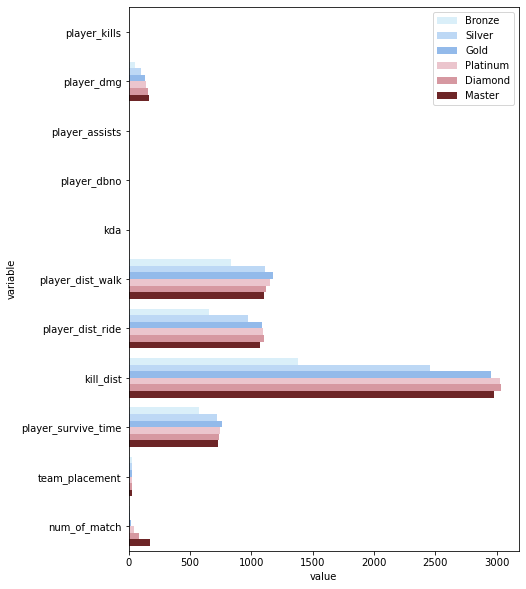

In [300]:
plt.figure(figsize=(7, 10))
colors = ['#D5F1FE', '#B4D7FE', '#85B8F8', '#F1BFC9', '#E18D9A', '#79191C']
sns.set_palette(sns.color_palette(colors))
sns.barplot(data=median_melt, x='value', y='variable', hue='tier', ci=None)
plt.legend(['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master'])

## MinMax Scaling

* Column별로 모아서 비교하기 위해 Scaling이 필요함

In [204]:
df.columns

Index(['player_kills', 'player_dmg', 'player_assists', 'player_dbno', 'kda',
       'player_dist_walk', 'player_dist_ride', 'kill_dist',
       'player_survive_time', 'team_placement', 'num_of_match', 'tier'],
      dtype='object')

In [205]:
scaling_columns = ['player_kills', 'player_dmg', 'player_assists', 'player_dbno', 'kda', 'player_dist_walk', 
                   'player_dist_ride', 'kill_dist', 'player_survive_time', 'team_placement', 'num_of_match']

In [206]:
scaling_df = df[scaling_columns]

In [207]:
scaling_df = (scaling_df - scaling_df.min())/(scaling_df.max() - scaling_df.min())

In [209]:
scaling_df['tier'] = df['tier']

In [214]:
median_scaling = scaling_df.groupby('tier').median().reset_index(drop=False)
median_scaling

,tier,player_kills,player_dmg,player_assists,player_dbno,kda,player_dist_walk,player_dist_ride,kill_dist,player_survive_time,team_placement,num_of_match
0,1.000,0.022,0.041,0.052,0.034,0.004,0.229,0.083,0.035,0.269,0.667,0.001
1,2.000,0.050,0.079,0.092,0.068,0.008,0.304,0.123,0.062,0.356,0.568,0.004
2,3.000,0.069,0.103,0.114,0.090,0.011,0.322,0.137,0.075,0.380,0.545,0.016
3,4.000,0.076,0.112,0.122,0.099,0.012,0.314,0.138,0.077,0.371,0.553,0.045
4,5.000,0.085,0.122,0.134,0.110,0.014,0.307,0.139,0.077,0.366,0.556,0.100
5,6.000,0.093,0.130,0.138,0.120,0.015,0.302,0.135,0.075,0.363,0.566,0.220


In [215]:
median_scaling_melt = pd.melt(median_scaling, id_vars='tier')

In [216]:
median_scaling_melt

,tier,variable,value
0,1.000,player_kills,0.022
1,2.000,player_kills,0.050
2,3.000,player_kills,0.069
3,4.000,player_kills,0.076
4,5.000,player_kills,0.085
...,...,...,...
61,2.000,num_of_match,0.004
62,3.000,num_of_match,0.016
63,4.000,num_of_match,0.045
64,5.000,num_of_match,0.100


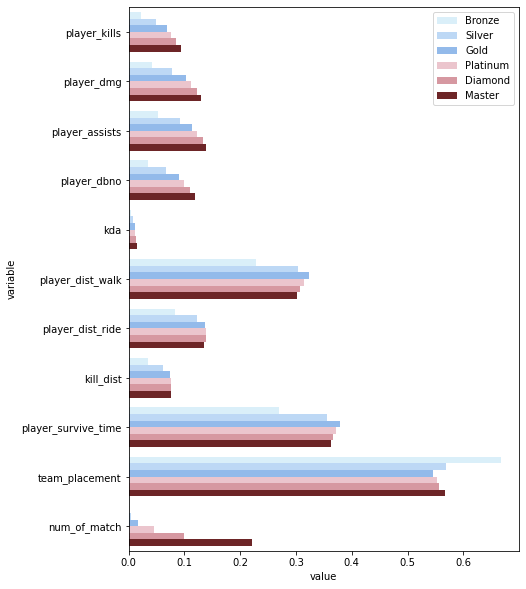

In [298]:
plt.figure(figsize=(7, 10))
colors = ['#D5F1FE', '#B4D7FE', '#85B8F8', '#F1BFC9', '#E18D9A', '#79191C']
sns.set_palette(sns.color_palette(colors))
sns.barplot(data=median_scaling_melt, x='value', y='variable', hue='tier', ci=None)
plt.legend(['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master'])

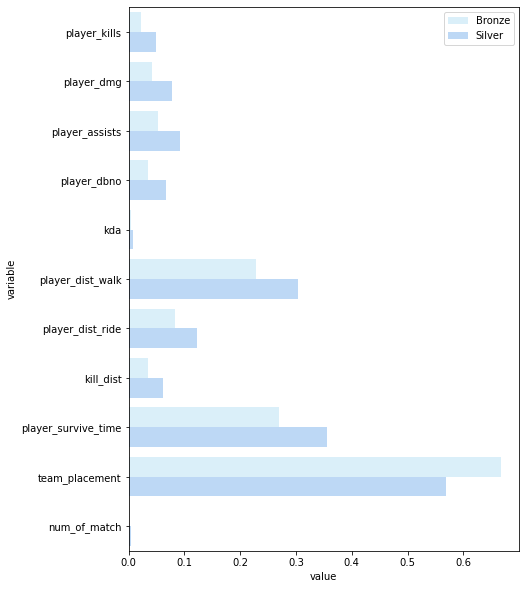

In [297]:
plt.figure(figsize=(7, 10))
colors = ['#D5F1FE', '#B4D7FE']
sns.set_palette(sns.color_palette(colors))
sns.barplot(data=median_scaling_melt[(median_scaling_melt['tier'] == 1)|(median_scaling_melt['tier'] == 2)], 
            x='value', y='variable', hue='tier', ci=None)
plt.legend(['Bronze', 'Silver'])

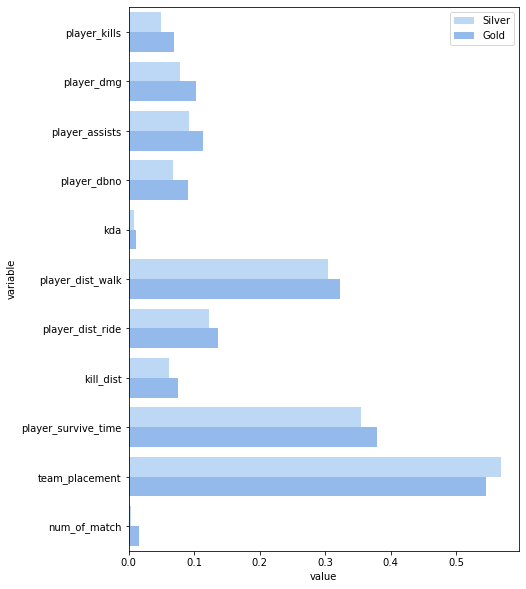

In [296]:
plt.figure(figsize=(7, 10))
colors = ['#B4D7FE', '#85B8F8']
sns.set_palette(sns.color_palette(colors))
sns.barplot(data=median_scaling_melt[(median_scaling_melt['tier'] == 2)|(median_scaling_melt['tier'] == 3)], 
            x='value', y='variable', hue='tier', ci=None)
plt.legend(['Silver', 'Gold'])

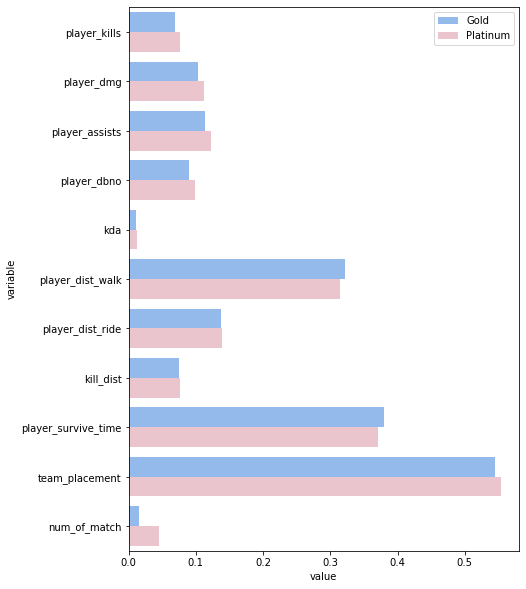

In [295]:
plt.figure(figsize=(7, 10))
colors = ['#85B8F8', '#F1BFC9']
sns.set_palette(sns.color_palette(colors))
sns.barplot(data=median_scaling_melt[(median_scaling_melt['tier'] == 3)|(median_scaling_melt['tier'] == 4)], 
            x='value', y='variable', hue='tier', ci=None)
plt.legend(['Gold', 'Platinum'])

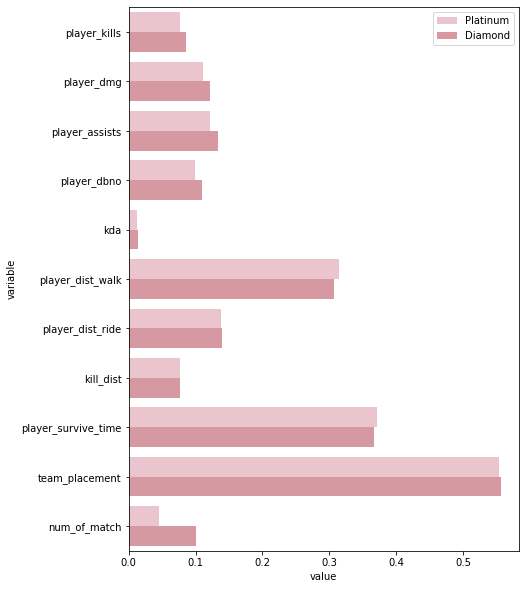

In [293]:
plt.figure(figsize=(7, 10))
colors = ['#F1BFC9', '#E18D9A']
sns.set_palette(sns.color_palette(colors))
sns.barplot(data=median_scaling_melt[(median_scaling_melt['tier'] == 4)|(median_scaling_melt['tier'] == 5)], 
            x='value', y='variable', hue='tier', ci=None)
plt.legend(['Platinum', 'Diamond'])

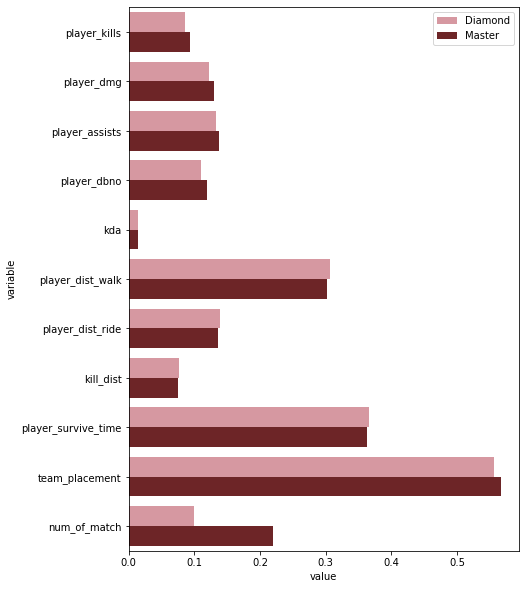

In [292]:
plt.figure(figsize=(7, 10))
colors = ['#E18D9A', '#79191C']
sns.set_palette(sns.color_palette(colors))
sns.barplot(data=median_scaling_melt[(median_scaling_melt['tier'] == 5)|(median_scaling_melt['tier'] == 6)], 
            x='value', y='variable', hue='tier', ci=None)
plt.legend(['Diamond', 'Master'])